# Operatori puntuali su immagine luminanza

Sia $I$ un tensore rappresentante un'immagine RGB di dimensioni ${H \times W}$, cioè 
$$
I^1 = R \in \mathbb{R}^{H \times W} \qquad I^2 = G \in \mathbb{R}^{H \times W} \qquad I^3 = B \in \mathbb{R}^{H \times W}
$$

Si definisce l'immagine luminanza $L \in \mathbb{R}^{H \times W}$ nel seguente modo:
$$
L = 0.299 R + 0.587 G + 0.114 B
$$

In [72]:
%cd ~/src/laboratori
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import numpy as np

img = mpimg.imread('img/1.jpg')

/home/jovyan/src/laboratori


Definire una funzione che trasformi `img` in immagine luminanza. Poi definire una funzione che trasformi `img` in immagine media.

In [73]:
def luminanza(img):
    return 0.2989 * img[:, :, 0] + 0.5870 * img[:, :, 1] + 0.1140 * img[:, :, 2]

def media(img):
    return np.mean(img, axis=2)

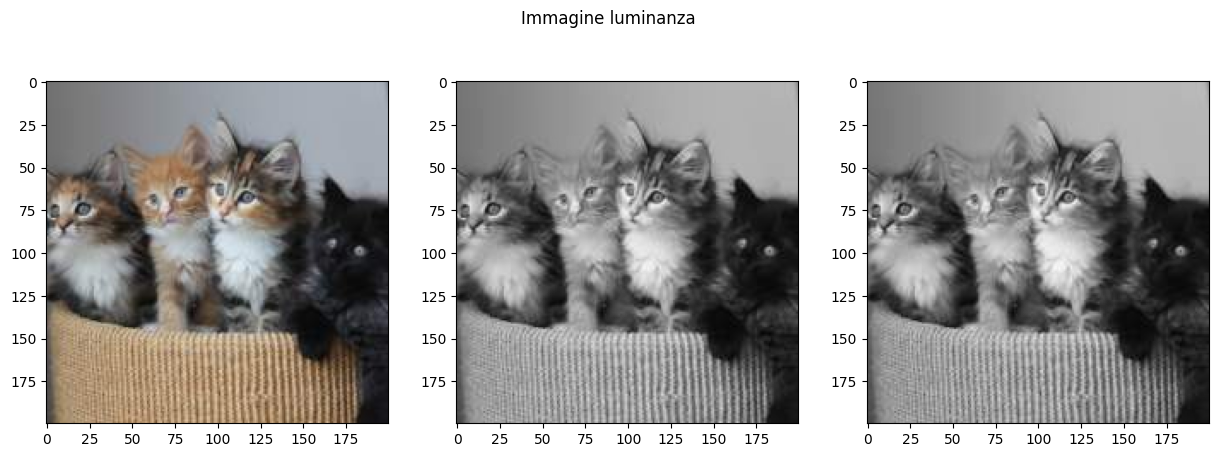

In [74]:
img_luminanza = luminanza(img)

img_media = media(img)

fig, axs = plt.subplots(1, 3, figsize=(15, 5))

fig.suptitle("Immagine luminanza")

axs[0].imshow(img)

axs[1].imshow(img_luminanza, cmap='gray')

axs[2].imshow(img_media, cmap='gray')

plt.show()

### Istogramma dei livelli di grigio

Fissato $N_l \in \mathbb{N}$ il numero dei livelli di grigio, si definisce su $L$ l'istogramma
$$
h : \{ 0, \dots, N_l - 1\} \rightarrow \mathbb{N}
$$
$$
h(l) = | \{ L_{ij} = l : \; i = 1, \dots, H, j = 1, \dots, W \} |
$$

Implementare la funzione istogramma.

In [75]:
def istogramma(img, n_livelli):
    return np.histogram(img, bins=n_livelli, range=(0, 256))[0]

### Inversione dei livelli di grigio

$$
I_{ij} = N_l - L_{ij}
$$

Implementare una funzione che inverta i livelli di grigio dell'immagine luminanza ottenuta precedentemente.  
Definirla prima in modo classico e poi usando lookup tables.

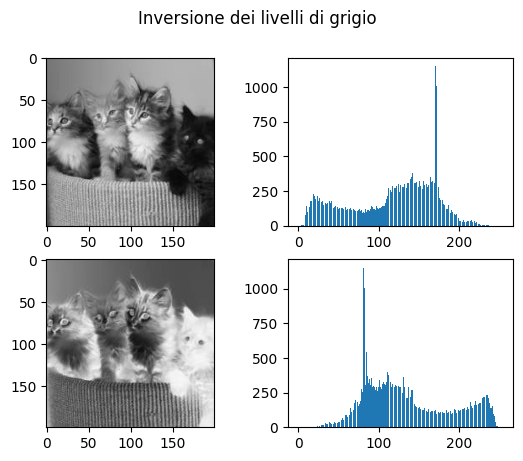

In [76]:
def inversione(img, n_livelli):
    return n_livelli - img - 1

n_livelli = 256

img_inv = inversione(img_luminanza, n_livelli)

h = istogramma(img_luminanza, n_livelli)
h_inv = istogramma(img_inv, n_livelli)

fig, axs = plt.subplots(2, 2)

fig.suptitle("Inversione dei livelli di grigio")

axs[0, 0].imshow(img_luminanza, cmap='gray')

axs[0, 1].bar(range(n_livelli), h)

axs[1, 0].imshow(img_inv, cmap='gray')

axs[1, 1].bar(range(n_livelli), h_inv)

plt.show()

### Compressione logaritmica

$$
Y_{ij} = \frac{1}{1 + N_l} \log({1 + L_{ij}})
$$

Implementare la compressione logaritmica, sia in modo classico che con lookup tables.  
Poi confrontare i risultati con la funzione di libreria `colors.LogNorm(min, max)`

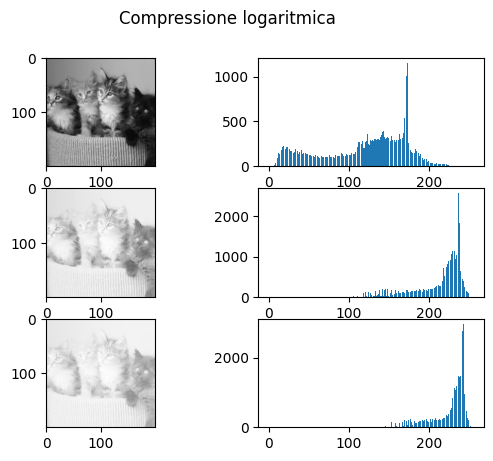

In [77]:
import matplotlib.colors as colors

def lognorm(img, n_livelli):
    return np.log1p(img) / np.log1p(n_livelli) * n_livelli

n_livelli = 256

img_log = lognorm(img_luminanza, n_livelli)

h = istogramma(img_luminanza, n_livelli)
h_log = istogramma(img_log, n_livelli)

fig, axs = plt.subplots(3, 2)

fig.suptitle("Compressione logaritmica")

axs[0, 0].imshow(img_luminanza, cmap='gray')

axs[0, 1].bar(range(n_livelli), h)

axs[1, 0].imshow(img_log, cmap='gray')

axs[1, 1].bar(range(n_livelli), h_log)

# Funzione di libreria
norm = colors.LogNorm(0.1, 255)
####

axs[2, 0].imshow(img_luminanza, norm=norm, cmap='gray')

h_log_mpl = istogramma(norm(img_luminanza) * n_livelli, n_livelli)
axs[2, 1].bar(range(n_livelli), h_log_mpl)

plt.show()


### Compressione potenza

Sia $\gamma \in \mathbb{R}$, $\gamma > 0$,
$$
P_{ij} = N_l^{1-\gamma} L_{ij}^\gamma
$$

Implementare la compressione potenza, sia in modo classico che con lookup tables.  
Confrontarla con la funzione di libreria `colors.PowerNorm(gamma)`.  
In entrambi i casi, sperimentare con i valori del parametro $\gamma$.

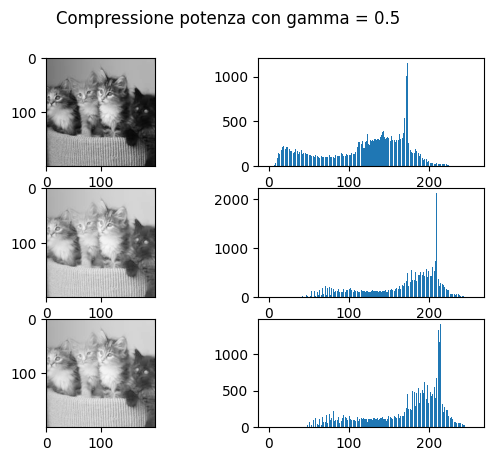

In [78]:
def pownorm(img, n_livelli, gamma):
    return (img / n_livelli) ** gamma * n_livelli


gamma = 0.5
img_pow = pownorm(img_luminanza, n_livelli, gamma)

h = istogramma(img_luminanza, n_livelli)
h_pow = istogramma(img_pow, n_livelli)

fig, axs = plt.subplots(3, 2)

fig.suptitle("Compressione potenza con gamma = " + str(gamma))

axs[0, 0].imshow(img_luminanza, cmap='gray')

axs[0, 1].bar(range(n_livelli), h)

axs[1, 0].imshow(img_pow, cmap='gray')

axs[1, 1].bar(range(n_livelli), h_pow)

norm = colors.PowerNorm(gamma=gamma)

axs[2, 0].imshow(img_luminanza, norm=norm, cmap='gray')

h_pow_mpl = istogramma(norm(img_luminanza) * n_livelli, n_livelli)
axs[2, 1].bar(range(n_livelli), h_pow_mpl)

plt.show()

### Espansione di contrasto rispetto a una soglia $T$

Sia $0 \leq T < N_l$,
$$
\begin{cases}
Y_{ij} = 0 & \text{ se } L_{ij} \leq T\\
Y_{ij} = N_l \frac{L_{ij} - T}{N_l - T} & \text{ se } L_{ij} > T
\end{cases}
$$

Implementare l'espansione di contrasto sia in modo classico che con lookup tables.  
Sperimentare con vari valori soglia.

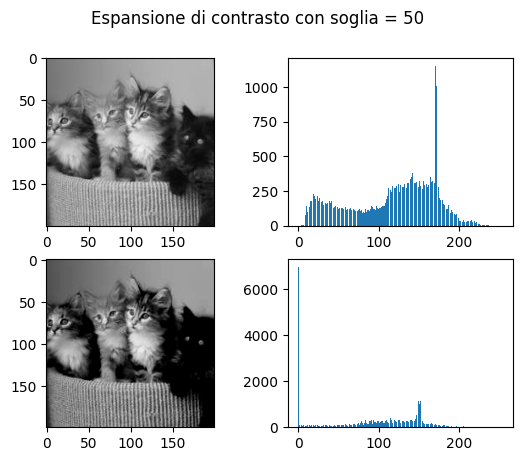

In [79]:

def contrasto(img, n_livelli, soglia):
    return np.where(img <= soglia, 0, n_livelli * (img - soglia) / (n_livelli - soglia))

soglia = 50

img_c = contrasto(img_luminanza, n_livelli, soglia)


h = istogramma(img_luminanza, n_livelli)
h_c = istogramma(img_c, n_livelli)

fig, axs = plt.subplots(2, 2)

fig.suptitle("Espansione di contrasto con soglia = " + str(soglia))

axs[0, 0].imshow(img_luminanza, cmap='gray')

axs[0, 1].bar(range(n_livelli), h)

axs[1, 0].imshow(img_c, cmap='gray')

axs[1, 1].bar(range(n_livelli), h_c)

plt.show()